# Curve Fitting:

In this notebook, we create a function that represents the polynomial equation,$$y(x)= \sum_i θ_i x^i$$ where x is a numpy array of x values, theta are the parameters of the polynomial.

We incorporate noise into the polynomial equation to simulate real-world scenarios.

Subsequently, we implement a stochastic gradient descent algorithm to iteratively refine these parameters and minimize the loss over 100 steps. Extending our analysis, we fit a third-order polynomial data using stochastic gradient descent with varying polynomial orders.

In [1]:
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
def polyModelWithNoise(x,theta,sigma):
    """
    Polynomial model with noise.

    Parameters:
    - x: numpy array of x values
    - theta: parameters of the polynomial
    - sigma: standard deviation of the noise distribution

    Returns:
    - y: numpy array of y values
    """
    # Generate the polynomial without noise
    y = np.sum(np.array([theta[i] * (x**i) for i in range(len(theta))]),axis=0)
    
    # Add noise
    noise = np.random.normal(0, sigma, size=len(x))
    y_noise = y + noise
    
    return y_noise

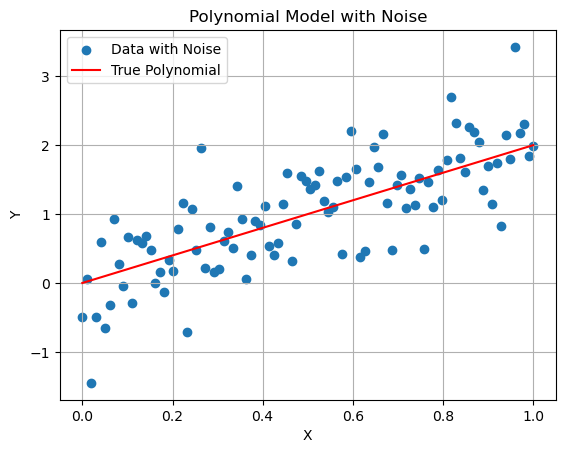

In [3]:
# Generate 100 linearly spaced points between 0 and 1
x_values = np.linspace(0, 1, 100)

# Set theta parameters and noise sigma
theta_parameters = [0, 2]
sigma = 0.5

# Generate y values using the polyModelWithNoise function
y_values = polyModelWithNoise(x_values, theta_parameters,sigma)

# Plot the results
plt.scatter(x_values, y_values, label='Data with Noise')
plt.plot(x_values, np.sum(np.array([theta_parameters[i] * (x_values**i) for i in range(len(theta_parameters))]), axis=0), color='red', label='True Polynomial')
plt.title('Polynomial Model with Noise')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

## Comment:
Looking at the graph, we can see that the data with noise, generally follows the linear trend of the polynomial function. 

Adjusting the value of sigma, representing the standard deviation of the noise distribution, influences the level of noise in the data. 

Increasing sigma tends to amplify these fluctuations, leading to a more scattered and less predictable pattern in the noisy data.

Reducing sigma narrows the influence of noise, revealing a clearer alignment with a straight line, as observed in the data following a trend similar to y=x.

The functions - polyGradient, samples, get_avg_fake_chisq are defined below to be later used in the stochastic gradient descent algorithm.

In [4]:
def polyGradient(x, theta):
    """
    Calculates the gradient of a polynomial function with respect to its parameters.

    Args:
        x (float): The input value.
        theta (numpy.ndarray): An array of polynomial parameters.

    Returns:
        numpy.ndarray: An array representing the gradient of the polynomial function.
    """
    # calculating an array represing the gradient of the polynomial function
    grad = np.array([(x**(i)) for i in range(len(theta))])
    
    return grad

In [5]:
# Get randomly sampled x values
def samples(nsamples):
    """
    Returns an array of random numbers from a uniform distribution between 0 and 1.

    Args:
        nsamples: The length of the random samples array.

    Returns:
        A numpy array of random numbers between 0 and 1.
    """
    return np.random.uniform(0, 1, size = nsamples)

In [6]:
def get_avg_fake_chisq(x, theta, sigma):
    """
    Returns the average fake chi-squared value.
        
    Args:
        x: A numpy array of x values
        theta: a list of the theta parameters

    Returns:
        A single number the fake chisquared (it is fake because we have set sigma to 1)
    """
    return np.average((polyModelWithNoise(x,theta,0)-polyModelWithNoise(x,true_theta,sigma))**2)

# Stochastic gradient descent:

This is an optimisation algorithm in machine learning, that adjusts model parameters using gradients calculated from data points, to minimise a cost function.

In the code below, we are trying to implement this code to iteratively reach the true theta parameters. The results will be shown through a plot of the minimised chi-squared value against the step number.

[0.10713179 2.00458835]


Text(0, 0.5, '(Fake) $\\chi^2$')

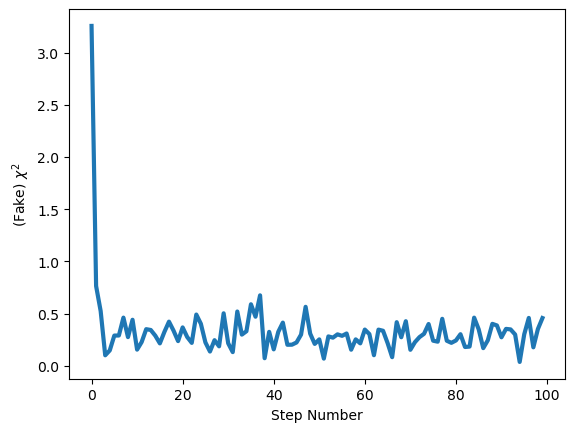

In [7]:
numSteps=100 #Number of steps in our stochastic gradient descent algorithm
theta=[-1,0.5]#Starting place, you can change this and see what happens
eta=0.5 #'Learning' rate, how far do we step each time
chiSqArray=np.zeros(numSteps)  #Array for plotting
thetaArray=np.zeros((numSteps+1,2))  #Array for plotting 
thetaArray[0]=theta #Starting step
true_theta = [0,2]
sigma = 0.5

for i in range(numSteps): #Loop over i from 0 to numSteps-1
    x=samples(10) # Generate 10 random samples... change this number to see what happens
    chiSq=get_avg_fake_chisq(x,theta,sigma)  #Get chisquared for these fake samples
    chiSqArray[i]=chiSq #For plotting
    #Work out difference to true function
    deviation= (polyModelWithNoise(x,theta,0)-polyModelWithNoise(x,true_theta,sigma))
    #Now work out where do go next
    theta-=eta*np.average(deviation[None,:]*polyGradient(x,theta),axis=1)
    thetaArray[i+1]=theta  #For plotting
print(theta)
# First plot is going to be step number vs chisquared
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
count=np.arange(numSteps+1)  #The integers from 0 up to num steps
ax.plot(count[:-1],chiSqArray,linewidth=3)
ax.set_xlabel("Step Number")
ax.set_ylabel(r"(Fake) $\chi^2$")    

Looking at the plot above, we can see that the fake chi-squared minimises quickly. The rest of the steps just fluctuate around simliar values. 

## 1st order polynomial:


In [8]:
theta1=[-1,0.5] # inital first order guess
chiSqArray=np.zeros(numSteps)  
thetaArray=np.zeros((numSteps+1,2))  
thetaArray[0]=theta1 
true_theta = [0,2,2,2] # 3rd order parameters

for i in range(numSteps): 
    x=samples(10)
    chiSq=get_avg_fake_chisq(x,theta1,sigma)  
    chiSqArray[i]=chiSq 
    deviation= (polyModelWithNoise(x,theta1,0)-polyModelWithNoise(x,true_theta,sigma))
    theta1-=eta*np.average(deviation[None,:]*polyGradient(x,theta1),axis=1)
    thetaArray[i+1]=theta1  #For plotting
print(theta1)

[-0.60700142  5.67010291]


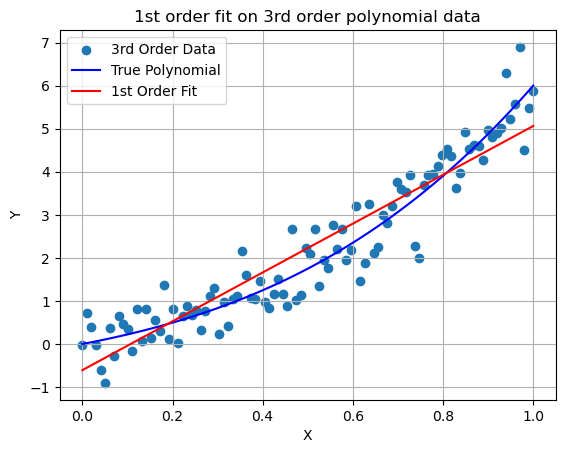

In [9]:
plt.scatter(x_values, polyModelWithNoise(x_values, true_theta,sigma), label='3rd Order Data')
plt.plot(x_values, polyModelWithNoise(x_values, true_theta,0), color='blue', label='True Polynomial')
plt.plot(x_values, polyModelWithNoise(x_values, theta1,0), color='red', label='1st Order Fit')
plt.title('1st order fit on 3rd order polynomial data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

Looking at the plot above, the first order fit achieves a reasonably good fit for the give range in x values, however comparing it to the true polynomial curve we can see it only has limited accuracy and it can be assumed that at a higher x values, the true polynomial will diverge from our 1st order fit.

## 3rd Order Polynomial

In [10]:
theta3=[1,0.5,0.5,0.5] # inital 3rd order guess
chiSqArray=np.zeros(numSteps)  
thetaArray=np.zeros((numSteps+1,4))  
thetaArray[0]=theta3 
true_theta = [0,2,2,2] 

for i in range(numSteps): 
    x=samples(10)
    chiSq=get_avg_fake_chisq(x,theta3,sigma)  
    chiSqArray[i]=chiSq 
    deviation= (polyModelWithNoise(x,theta3,0)-polyModelWithNoise(x,true_theta,sigma))
    theta3-=eta*np.average(deviation[None,:]*polyGradient(x,theta3),axis=1)
    thetaArray[i+1]=theta3  
print(theta3)

[-0.00612861  1.76741955  1.94171265  1.88477147]


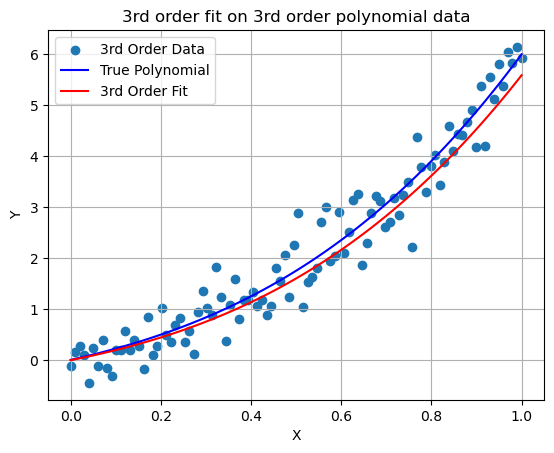

In [11]:
plt.scatter(x_values, polyModelWithNoise(x_values, true_theta,sigma), label='3rd Order Data')
plt.plot(x_values, polyModelWithNoise(x_values, true_theta,0), color='blue', label='True Polynomial')
plt.plot(x_values, polyModelWithNoise(x_values, theta3,0), color='red', label='3rd Order Fit')
plt.title('3rd order fit on 3rd order polynomial data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

In the plot above, our fitted curve, using the stochastic gradient descent algorithm, closely aligns with the true polynomial curve. Our algorithm gives a very good fit for the noisy data, which is to be expected since we are fiting a 3rd order polynomial to 3rd order data. 

## 7th Order polynomial

In [12]:
theta7=[1,0.5,-1,5,0.5,0.5,1,2] # inital 7th order guess
chiSqArray=np.zeros(numSteps)  
thetaArray=np.zeros((numSteps+1,8))  
thetaArray[0]=theta7 
true_theta = [0,2,2,2] 

for i in range(numSteps): 
    x=samples(10)
    chiSq=get_avg_fake_chisq(x,theta7,sigma)  
    chiSqArray[i]=chiSq 
    deviation= (polyModelWithNoise(x,theta7,0)-polyModelWithNoise(x,true_theta,sigma))
    theta7-=eta*np.average(deviation[None,:]*polyGradient(x,theta7),axis=1)
    thetaArray[i+1]=theta7  
print(theta7)

[ 0.27748522  1.89990299 -0.48748896  4.77416691 -0.22065467 -0.54359218
 -0.25311618  0.61246264]


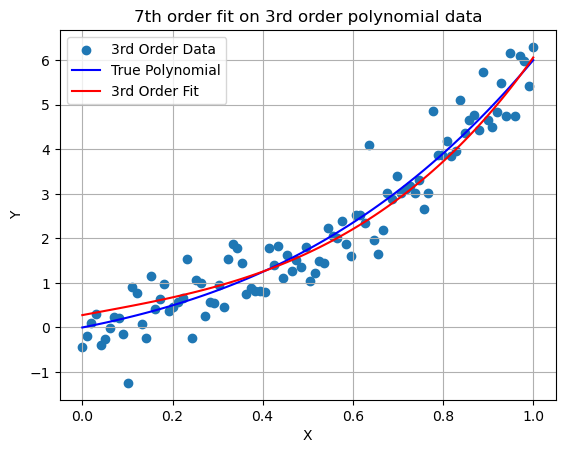

In [13]:
plt.scatter(x_values, polyModelWithNoise(x_values, true_theta,sigma), label='3rd Order Data')
plt.plot(x_values, polyModelWithNoise(x_values, true_theta,0), color='blue', label='True Polynomial')
plt.plot(x_values, polyModelWithNoise(x_values, theta7,0), color='red', label='3rd Order Fit')
plt.title('7th order fit on 3rd order polynomial data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

Our 7th order polynomial fits the data reasonably well as we can see that it is quite close to the true polynomial curve for the x range given, however, for a larger range the 7th order curve will likely diverge quickly from the data.

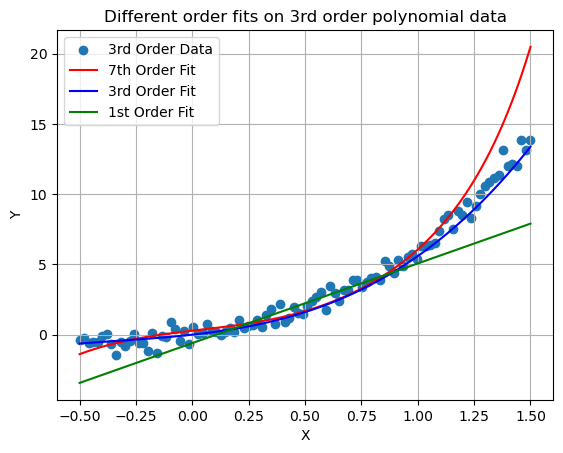

In [14]:
x_expand = np.linspace(-0.5,1.5,100)
plt.scatter(x_expand, polyModelWithNoise(x_expand, true_theta,sigma), label='3rd Order Data')
plt.plot(x_expand, polyModelWithNoise(x_expand, theta7,0), color='red', label='7th Order Fit')
plt.plot(x_expand, polyModelWithNoise(x_expand, theta3,0), color='blue', label='3rd Order Fit')
plt.plot(x_expand, polyModelWithNoise(x_expand, theta1,0), color='green', label='1st Order Fit')
plt.title('Different order fits on 3rd order polynomial data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()


## Comment:
Comparing the data to our three best fit models, we can see that the 3rd order fit is clearly the closest fit to the data as it closely aligns with the data for the whole range of x values.

Both the 7th and 1st order fits immediately diverge from the data after x = 1.00. 

The 1st order polynomial is only a good fit for a limited range x values, approxiamtely between 0.00 - 1.00. 

The 7th order polynoial fits the data better than the 1st order, and over a large range of approximately -0.5 - 1.00. 

As anticipated, the 7th order polynomial diverges rapidly from the data beyond x=1. This divergence is likely due to the polynomial's higher-order gradient, causing the gradient of the curve to increase more rapidly as the values in x increase.

## Conclusion

In conclusion, our exploration of curve fitting using polynomial models and the stochastic gradient descent revealed the significance of balancing model complexity and overfitting. The 3rd order polynomial showed to be the most accurate fit, aligning closely with the data across the entire x range. However, the 1st order polynomial showed limited accuracy, fitting well only within a narrow x range. The 7th order polynomial, while fitting the given data over the original range, demonstrated a tendency to diverge quickly when plotted beyond the trained range. This emphasises the importance of selecting an appropriate polynomial order to best fit the data.
